# Qfold cnot 7x2 Qiskit

<a id = 'index'></a>

* **Step 1.** - [Initial setup](#set)

* **Step 2.** - [Defining the circuit](#nc)

* **Step 3.** - [Optimizing the circuit](#op)

* **Step 4.** - [Running in real device and data treatment](#real)

* **Step 5.** - [Tests with different inputs](#oin)

<a name="set"/>

## Initial Setup

To achieve results comparable to the ones present in paper [1](#ref1), ensure the application of the correct imports and versions. 

In [1]:
import qiskit
import qiskit.tools.jupyter
%qiskit_version_table

In [2]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [3]:
# these imports are essential since the new circuit section
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

In [ ]:
# this import is essential since the simulation section
from qiskit import Aer

In [5]:
# these imports are essential since the optimization section
from qiskit import IBMQ
from qiskit.tools.monitor import backend_monitor
from qiskit.compiler import transpile

In [18]:
# this import is essential since run in real device section
from qiskit.tools.visualization import plot_histogram

In [32]:
# this is essential in the PyZX section
import pyzx as zx

In [31]:
# this is essential in the ignis section
from qiskit.ignis.mitigation.measurement import ( complete_meas_cal, CompleteMeasFitter, MeasurementFilter )

#### Important/Useful functions 

In [9]:
def circuit_inf(quantum_circuit):
    circuit_information={}
    
    # total number of operations in the circuit. no unrolling is done.
    circuit_size = quantum_circuit.size()
    circuit_information['size']=circuit_size
    
    # depth of circuit (number of ops on the critical path)
    circuit_depth = quantum_circuit.depth()
    circuit_information['depth']=circuit_depth
    
    # number of unentangled subcircuits in this circuit.
    # each subcircuit can in principle be executed on a different quantum processor!
    circuit_tensor = quantum_circuit.num_tensor_factors()
    circuit_information['tensor factors']= circuit_tensor
    
    # a breakdown of operations by type
    circuit_count = quantum_circuit.count_ops()
    circuit_information['operations']=circuit_count
    return circuit_information

In [11]:
def running_circuit(circuit, backend, shots=1024):
    job_run = execute(circuit, backend, shots=shots)
    jobID_run = job_run.job_id()

    result_run = job_run.result()
    counts_run = result_run.get_counts(circuit)
    
    return jobID_run, counts_run

In [39]:
def sum_the_target_0(counts_raw):
    k=counts_raw.keys()
    sum_counts_ok=sum_counts_bad=0
    lk=list(k)
    for x in lk:
        if x[3]=='0':
            sum_counts_ok=sum_counts_ok+counts_raw.get(x)
        else:
            sum_counts_bad=sum_counts_bad+counts_raw.get(x)
    return {'good': sum_counts_ok, 'bad': sum_counts_bad}

def sum_right(target, counts_raw):
    s = sum_the_target_0(counts_raw)
    if target==1:
        s['good_temp'] = s.pop('good')
        s['good']= s.pop('bad')
        s['bad']= s.pop('good_temp')
        
    return s

<p style='text-align: right;'> [back to top](#index) </p>

<a id = 'nc'></a>

## New Circuit


Recall that the output of Quipper language goes thought the translator in quipperToQiskit. In this format, it is possible to define the circuit easily. 

Moreover, it is essential to simulate the experiment to see what are the ideal outputs. 

Qiskit swaps the least and the most significant qubits. Therefore, to keep conformity, there was a rearrangement of the least and most significant qubits. 

In other words, 
* qubit 0 is now qubit 4
* qubit 1 is now qubit 3
* qubit 2 holds
* qubit 3 is not qubut 1
* and qubit 4 is now qubit 0


In [20]:
# number of qubits
n = 5
# create quantum register named 'qr'
qr = QuantumRegister(n, 'qr')
# create classical register named 'cr'
cr = ClassicalRegister(n, 'cr')

In [21]:
#create quantum circuit
qc= QuantumCircuit(qr,cr)

In [22]:
qc.h(qr[0])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.t(qr[4])
qc.t(qr[3])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[0])
qc.tdg(qr[3])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[1])
qc.t(qr[1])
qc.t(qr[2])
qc.t(qr[0])
qc.cx(qr[2],qr[0])
qc.cx(qr[1],qr[2])
qc.cx(qr[0],qr[1])
qc.tdg(qr[2])
qc.t(qr[1])
qc.cx(qr[0],qr[2])
qc.tdg(qr[2])
qc.tdg(qr[0])
qc.cx(qr[1],qr[2])
qc.cx(qr[0],qr[1])
qc.cx(qr[2],qr[0])
qc.h(qr[1])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.t(qr[3])
qc.t(qr[0])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.tdg(qr[3])
qc.tdg(qr[4])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.h(qr[0])
#qc.reset(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.t(qr[4])
qc.t(qr[3])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[0])
qc.tdg(qr[3])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[1])
qc.t(qr[1])
qc.tdg(qr[2])
qc.t(qr[0])
qc.cx(qr[2],qr[0])
qc.cx(qr[1],qr[2])
qc.cx(qr[0],qr[1])
qc.t(qr[2])
qc.tdg(qr[1])
qc.cx(qr[0],qr[2])
qc.tdg(qr[2])
qc.t(qr[0])
qc.cx(qr[1],qr[2])
qc.cx(qr[0],qr[1])
qc.cx(qr[2],qr[0])
qc.h(qr[1])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.t(qr[3])
qc.t(qr[0])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.tdg(qr[3])
qc.tdg(qr[4])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.h(qr[0])
#qc.reset(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[4])
qc.t(qr[3])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[0])
qc.t(qr[3])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[1])
qc.t(qr[1])
qc.t(qr[2])
qc.t(qr[0])
qc.cx(qr[2],qr[0])
qc.cx(qr[1],qr[2])
qc.cx(qr[0],qr[1])
qc.tdg(qr[2])
qc.t(qr[1])
qc.cx(qr[0],qr[2])
qc.tdg(qr[2])
qc.tdg(qr[0])
qc.cx(qr[1],qr[2])
qc.cx(qr[0],qr[1])
qc.cx(qr[2],qr[0])
qc.h(qr[1])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.tdg(qr[3])
qc.t(qr[0])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.tdg(qr[3])
qc.t(qr[4])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.h(qr[0])

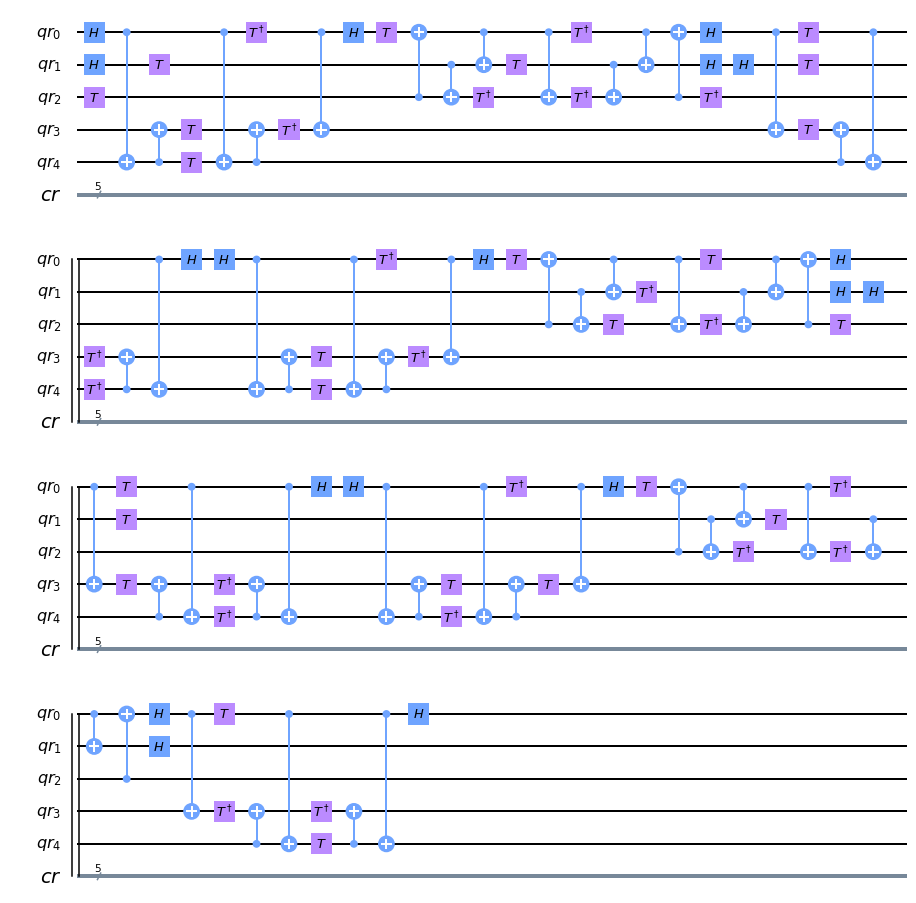

In [8]:
qc.draw(output='mpl', scale=0.5)

In [10]:
circuit_inf(qc)

{'depth': 81,
 'operations': OrderedDict([('cx', 51), ('t', 24), ('tdg', 21), ('h', 18)]),
 'size': 114,
 'tensor factors': 1}

### Simulation

This simulation can run with Aer or BasicAer. 

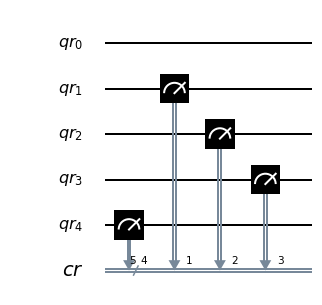

In [23]:
# add measure gates
m4 = QuantumCircuit(qr, cr)

m4.measure(qr[4],cr[4])
m4.measure(qr[1],cr[1])
m4.measure(qr[2],cr[2])
m4.measure(qr[3],cr[3])

m4.draw(output='mpl')

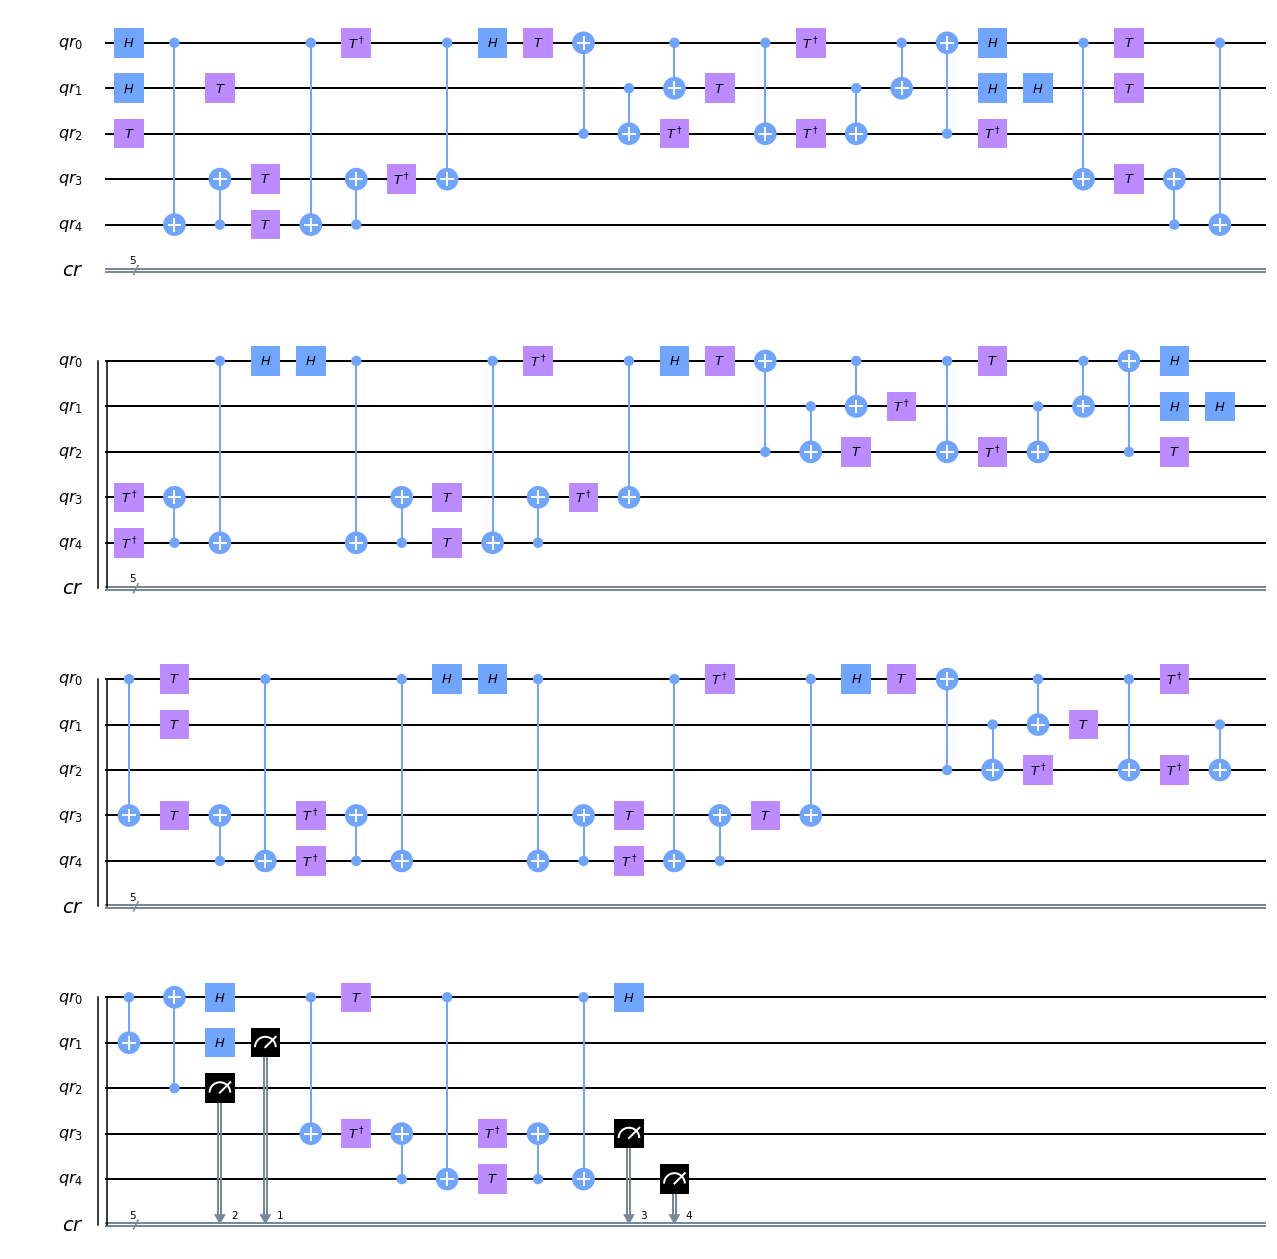

In [24]:
qc_m = qc + m4

qc_m.draw(output='mpl')

In [14]:
circuit_inf(qc_m)

{'depth': 81,
 'operations': OrderedDict([('cx', 51),
              ('t', 24),
              ('tdg', 21),
              ('h', 18),
              ('measure', 4)]),
 'size': 118,
 'tensor factors': 1}

In [25]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc_m, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [26]:
counts_sim = result_sim.get_counts(qc_m)

In [27]:
print(counts_sim)

{'00000': 1024}


<p style='text-align: right;'> [back to top](#index) </p>

<a id = 'op'></a>

## Optimizing the circuit


The considerable volume of the circuit displayed points to its optimization. One trivial approach is to apply the IBM Q transpiler. 

Since this optimization was insufficient, the circuit ended rewritten with PyZX. 

In [6]:
provider = IBMQ.load_account()

In [7]:
my_providers=IBMQ.providers()
print(my_providers)

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>, <AccountProvider for IBMQ(hub='ibm-q-minho', group='academicprojects', project='quantalab')>]


In [8]:
my_provider_academic = IBMQ.get_provider(hub='ibm-q-minho', group='academicprojects', project='quantalab')

my_provider_academic.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-minho', group='academicprojects', project='quantalab')>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(hub='ibm-q-minho', group='academicprojects', project='quantalab')>,
 <IBMQBackend('ibmq_boeblingen') from IBMQ(hub='ibm-q-minho', group='academicprojects', project='quantalab')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q-minho', group='academicprojects', project='quantalab')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q-minho', group='academicprojects', project='quantalab')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-minho', group='academicprojects', project='quantalab')>,
 <IBMQBackend('ibmq_johannesburg') from IBMQ(hub='ibm-q-minho', group='academicprojects', project='quantalab')>,
 <IBMQBackend('ibmq_rochester') from IBMQ(hub='ibm-q-minho', group='academicprojects', project='quantalab')>]

In [9]:
my_provider_ibmq = IBMQ.get_provider(hub='ibm-q', group='open', project='main') 

my_provider_ibmq.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [22]:
%qiskit_backend_overview

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\models\backendconfiguration.py:356: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


**Boebligen** - choosen because has hight T2 comparing to the others. 

In [10]:
backend = my_provider_academic.get_backend('ibmq_boeblingen')

In [23]:
qc_sim = transpile(qc_m, backend=backend)

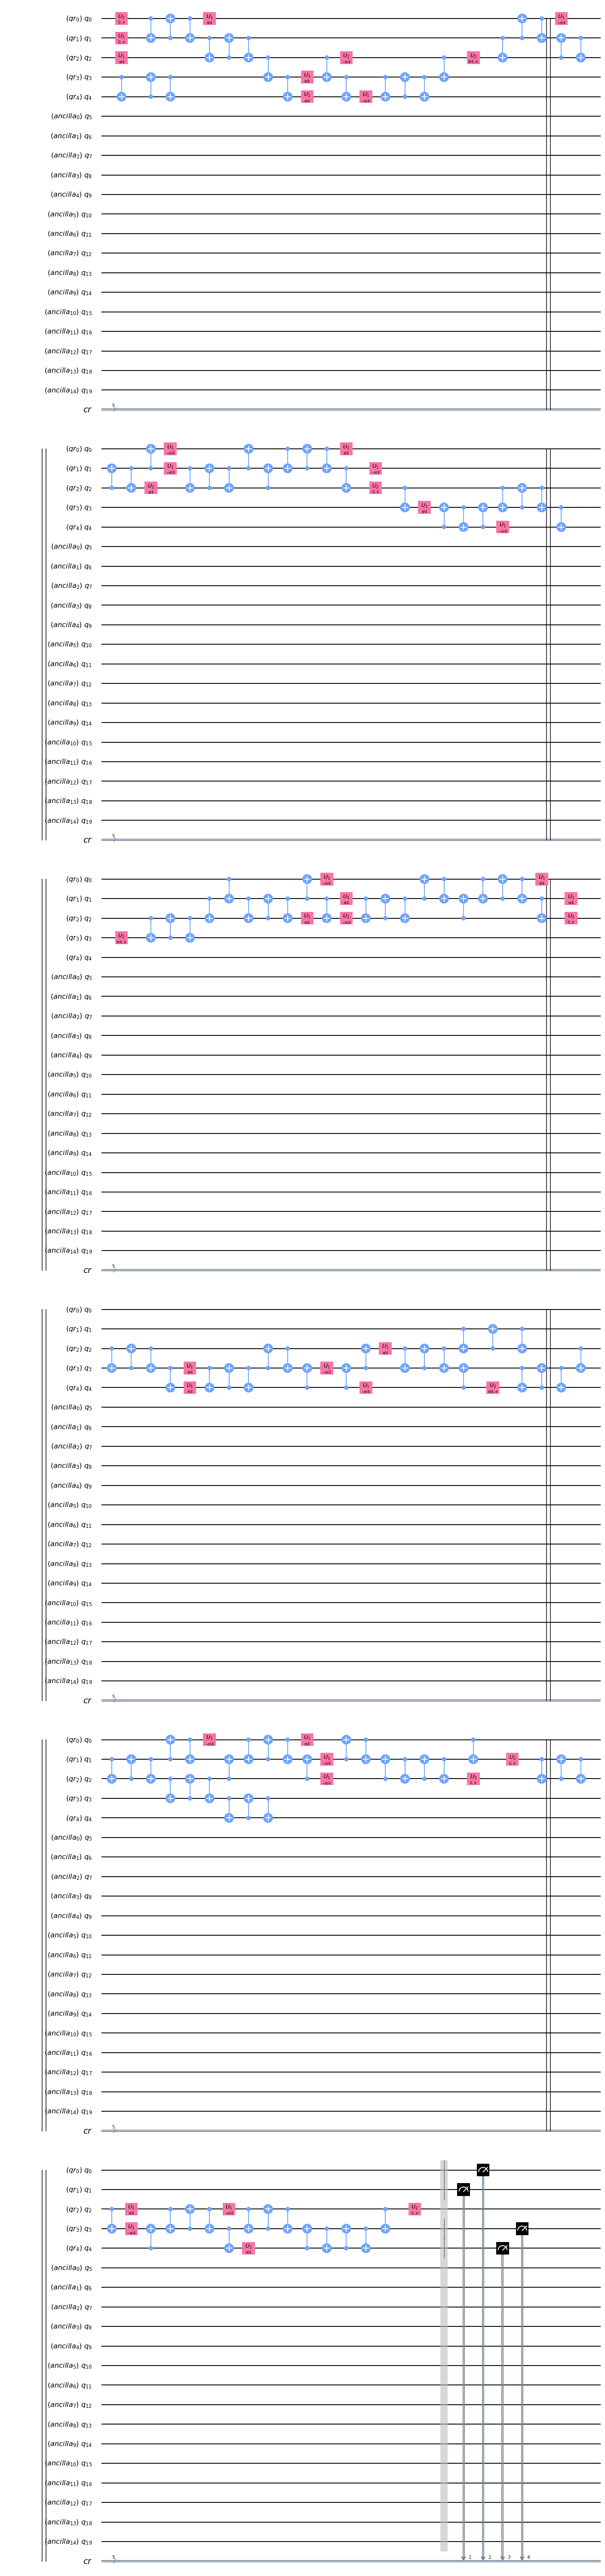

In [24]:
qc_sim.draw(output='mpl')

In [25]:
circuit_inf(qc_sim)

{'depth': 132,
 'operations': OrderedDict([('cx', 125),
              ('u1', 33),
              ('u2', 10),
              ('measure', 4),
              ('barrier', 1)]),
 'size': 172,
 'tensor factors': 16}

In [26]:
backend_monitor(backend)

ibmq_boeblingen
Configuration
-------------
    n_qubits: 20
    operational: True
    status_msg: active
    pending_jobs: 3
    backend_version: 1.0.6
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    open_pulse: True
    sample_name: HexV2
    u_channel_lo: [[{'scale': [1.0, 0.0], 'q': 1}], [{'scale': [1.0, 0.0], 'q': 0}], [{'scale': [1.0, 0.0], 'q': 2}], [{'scale': [1.0, 0.0], 'q': 6}], [{'scale': [1.0, 0.0], 'q': 1}], [{'scale': [1.0, 0.0], 'q': 3}], [{'scale': [1.0, 0.0], 'q': 2}], [{'scale': [1.0, 0.0], 'q': 4}], [{'scale': [1.0, 0.0], 'q': 8}], [{'scale': [1.0, 0.0], 'q': 3}], [{'scale': [1.0, 0.0], 'q': 6}], [{'scale': [1.0, 0.0], 'q': 10}], [{'scale': [1.0, 0.0], 'q': 1}], [{'scale': [1.0, 0.0], 'q': 5}], [{'scale': [1.0, 0.0], 'q': 7}], [{'scale': [1.0, 0.0], 'q': 6}], [{'scale': [1.0, 0.0], 'q': 8}], [{'scale': [1.0, 0.0], 'q': 12}], [{'scale': [1.0, 0.0], 'q': 3}], [{'scale': [1.0, 0.0], 'q': 7}], [{'scale': [1.0, 0.0], 'q': 9}], [{'

### IBM Q Transpiler

In [28]:
optimized_0 = transpile(qc_m, backend=backend, optimization_level=0)
circuit_inf(optimized_0)

{'depth': 146,
 'operations': OrderedDict([('cx', 126),
              ('u1', 45),
              ('u2', 18),
              ('measure', 4),
              ('barrier', 1)]),
 'size': 193,
 'tensor factors': 16}

In [29]:
optimized_1 = transpile(qc_m, backend=backend, optimization_level=1)
circuit_inf(optimized_1)

{'depth': 147,
 'operations': OrderedDict([('cx', 159),
              ('u1', 37),
              ('u2', 10),
              ('measure', 4),
              ('barrier', 1)]),
 'size': 210,
 'tensor factors': 16}

In [30]:
optimized_2 = transpile(qc_m, backend=backend, optimization_level=2)
circuit_inf(optimized_2)

{'depth': 122,
 'operations': OrderedDict([('cx', 125),
              ('u1', 35),
              ('u2', 10),
              ('measure', 4),
              ('barrier', 1)]),
 'size': 174,
 'tensor factors': 16}

In [31]:
optimized_3 = transpile(qc_m, backend=backend, optimization_level=3)
circuit_inf(optimized_3)

{'depth': 139,
 'operations': OrderedDict([('cx', 109),
              ('u3', 43),
              ('u2', 32),
              ('u1', 20),
              ('measure', 4),
              ('barrier', 1)]),
 'size': 208,
 'tensor factors': 16}

<div class="alert alert-block alert-info">
try with optimization 2 and 3

<p>2 has less depth.</p>

<p>3 has less cnot.</p>
</div>

### PyZX

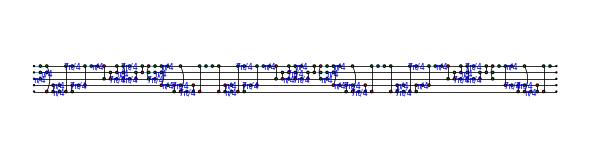

In [33]:
my_qc = zx.Circuit.from_quipper_file("7x2Quipper.txt")

zx.draw(my_qc)

In [34]:
print(my_qc.gates)

[HAD(0), CNOT(0,4), CNOT(4,3), T(4), T(3), CNOT(0,4), CNOT(4,3), T*(0), T*(3), CNOT(0,3), HAD(0), HAD(1), T(1), T(2), T(0), CNOT(2,0), CNOT(1,2), CNOT(0,1), T*(2), T(1), CNOT(0,2), T*(2), T*(0), CNOT(1,2), CNOT(0,1), CNOT(2,0), HAD(1), HAD(0), CNOT(0,3), T(3), T(0), CNOT(4,3), CNOT(0,4), T*(3), T*(4), CNOT(4,3), CNOT(0,4), HAD(0), HAD(0), CNOT(0,4), CNOT(4,3), T(4), T(3), CNOT(0,4), CNOT(4,3), T*(0), T*(3), CNOT(0,3), HAD(0), HAD(1), T(1), T*(2), T(0), CNOT(2,0), CNOT(1,2), CNOT(0,1), T(2), T*(1), CNOT(0,2), T*(2), T(0), CNOT(1,2), CNOT(0,1), CNOT(2,0), HAD(1), HAD(0), CNOT(0,3), T(3), T(0), CNOT(4,3), CNOT(0,4), T*(3), T*(4), CNOT(4,3), CNOT(0,4), HAD(0), HAD(0), CNOT(0,4), CNOT(4,3), T*(4), T(3), CNOT(0,4), CNOT(4,3), T*(0), T(3), CNOT(0,3), HAD(0), HAD(1), T(1), T(2), T(0), CNOT(2,0), CNOT(1,2), CNOT(0,1), T*(2), T(1), CNOT(0,2), T*(2), T*(0), CNOT(1,2), CNOT(0,1), CNOT(2,0), HAD(1), HAD(0), CNOT(0,3), T*(3), T(0), CNOT(4,3), CNOT(0,4), T*(3), T(4), CNOT(4,3), CNOT(0,4), HAD(0)]


In [35]:
print(my_qc.stats())

Circuit 7x2Quipper.txt on 5 qubits with 114 gates.
        45 is the T-count
        69 Cliffords among which 
        51 2-qubit gates and 18 Hadamard gates.


In [36]:
mg = my_qc.to_graph()
print(mg)

Graph(175 vertices, 221 edges)


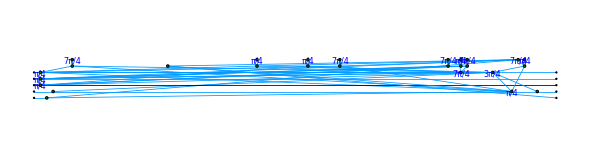

In [37]:
zx.simplify.full_reduce(mg)
zx.draw(mg)

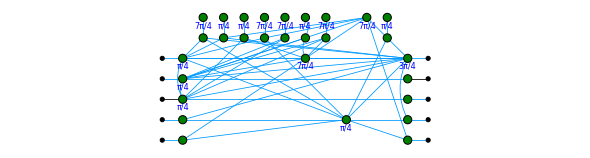

In [38]:
mg.normalise()
zx.draw(mg)

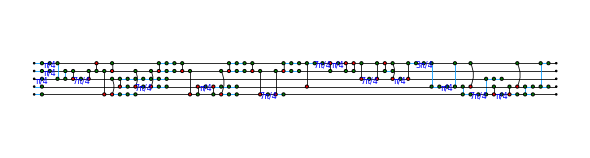

In [39]:
mc = zx.extract.streaming_extract(mg.copy(), True)
zx.draw(mc)

In [40]:
# Turn graph back into circuit
mc2 = zx.extract.streaming_extract(mg).to_basic_gates()

In [41]:
print(mc2.stats())

Circuit  on 5 qubits with 101 gates.
        15 is the T-count
        86 Cliffords among which 
        40 2-qubit gates and 46 Hadamard gates.


In [42]:
mc3 = zx.optimize.full_optimize(mc2)
print(mc3.stats())

Circuit  on 5 qubits with 42 gates.
        15 is the T-count
        27 Cliffords among which 
        20 2-qubit gates and 6 Hadamard gates.


In [43]:
print(mc3.to_qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
cx q[2], q[0];
rz(0.25*pi) q[2];
cx q[3], q[1];
z q[3];
cz q[3], q[4];
cz q[2], q[4];
h q[0];
rz(0.75*pi) q[0];
h q[1];
rz(0.75*pi) q[1];
cx q[2], q[1];
cx q[4], q[0];
rz(0.75*pi) q[0];
rz(0.75*pi) q[1];
cx q[3], q[0];
cz q[1], q[4];
t q[0];
cx q[4], q[0];
t q[0];
cx q[3], q[0];
h q[0];
rz(0.75*pi) q[0];
cx q[2], q[0];
rz(0.75*pi) q[0];
cx q[1], q[0];
t q[0];
cx q[2], q[0];
t q[0];
cx q[1], q[0];
cx q[2], q[0];
cx q[2], q[1];
h q[0];
rz(0.75*pi) q[0];
h q[1];
cx q[4], q[0];
rz(0.75*pi) q[0];
cx q[3], q[0];
t q[0];
cx q[4], q[0];
t q[0];
cx q[3], q[0];
h q[0];



In [120]:
f = open("qasm_pyzx.txt", "w")
f.write(mc3.to_qasm())
f.close()

In [58]:
qc_pyzx = QuantumCircuit(qr, cr)

In [59]:
qc_pyzx.cx(qr[2], qr[0])
qc_pyzx.rz(0.25*pi, qr[2])
qc_pyzx.cx(qr[3], qr[1])
qc_pyzx.z(qr[3])
qc_pyzx.cz(qr[3], qr[4])
qc_pyzx.cz(qr[2], qr[4])
qc_pyzx.h(qr[0])
qc_pyzx.rz(0.75*pi, qr[0])
qc_pyzx.h(qr[1])
qc_pyzx.rz(0.75*pi, qr[1])
qc_pyzx.cx(qr[2], qr[1])
qc_pyzx.cx(qr[4], qr[0])
qc_pyzx.rz(0.75*pi, qr[0])
qc_pyzx.rz(0.75*pi, qr[1])
qc_pyzx.cx(qr[3], qr[0])
qc_pyzx.cz(qr[1], qr[4])
qc_pyzx.t(qr[0])
qc_pyzx.cx(qr[4], qr[0])
qc_pyzx.t(qr[0])
qc_pyzx.cx(qr[3], qr[0])
qc_pyzx.h(qr[0])
qc_pyzx.rz(0.75*pi, qr[0])
qc_pyzx.cx(qr[2], qr[0])
qc_pyzx.rz(0.75*pi, qr[0])
qc_pyzx.cx(qr[1], qr[0])
qc_pyzx.t(qr[0])
qc_pyzx.cx(qr[2], qr[0])
qc_pyzx.t(qr[0])
qc_pyzx.cx(qr[1], qr[0])
qc_pyzx.cx(qr[2], qr[0])
qc_pyzx.cx(qr[2], qr[1])
qc_pyzx.h(qr[0])
qc_pyzx.rz(0.75*pi, qr[0])
qc_pyzx.h(qr[1])
qc_pyzx.cx(qr[4], qr[0])
qc_pyzx.rz(0.75*pi, qr[0])
qc_pyzx.cx(qr[3], qr[0])
qc_pyzx.t(qr[0])
qc_pyzx.cx(qr[4], qr[0])
qc_pyzx.t(qr[0])
qc_pyzx.cx(qr[3], qr[0])
qc_pyzx.h(qr[0])

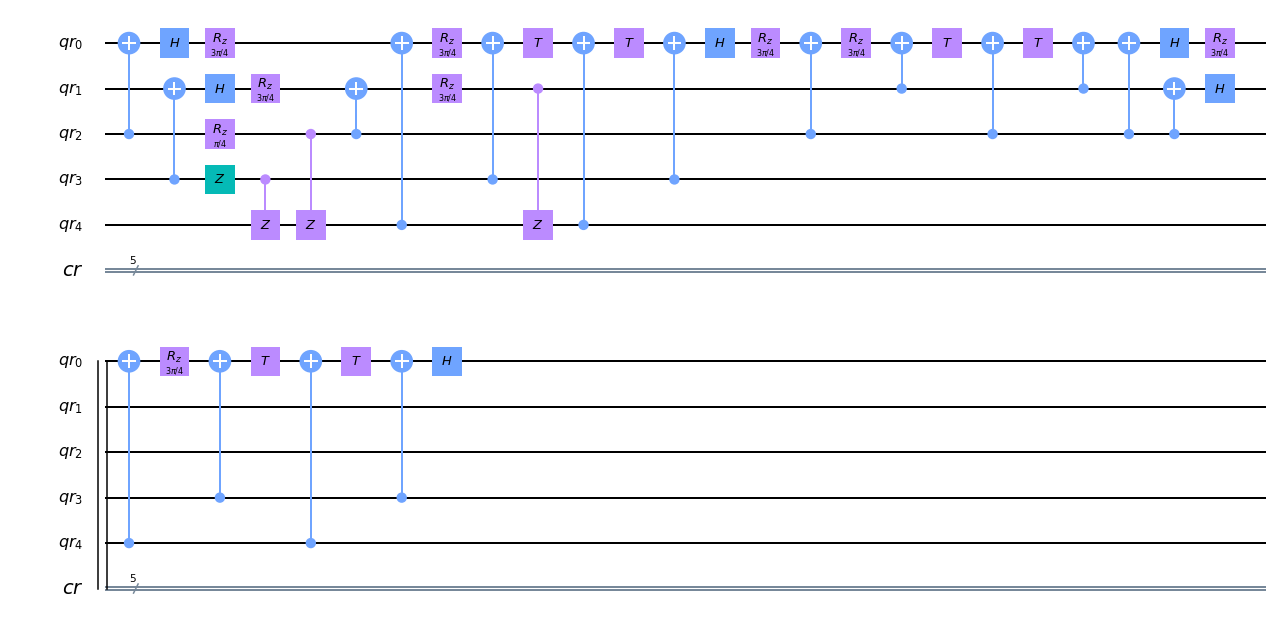

In [60]:
qc_pyzx.draw(output='mpl')

In [44]:
circuit_inf(qc_pyzx)

{'depth': 31,
 'operations': OrderedDict([('cx', 17),
              ('rz', 9),
              ('h', 6),
              ('t', 6),
              ('measure', 4),
              ('cz', 3),
              ('z', 1)]),
 'size': 46,
 'tensor factors': 1}

In [62]:
qc_pyzx = qc_pyzx+m4

In [33]:
id_temp, counts_pyzx_sim = running_circuit(qc_pyzx, backend_sim)
print(counts_pyzx_sim)

{'00000': 1024}


In [52]:
#qc_sim = transpile(qc_m, basis_gates=['u1', 'u3', 'u2', 'cx'])
qc_sim_pyzx = transpile(qc_pyzx, backend=backend)

In [53]:
circuit_inf(qc_sim_pyzx)

{'depth': 55,
 'operations': OrderedDict([('cx', 60),
              ('u1', 12),
              ('u2', 10),
              ('measure', 4),
              ('barrier', 1)]),
 'size': 86,
 'tensor factors': 16}

In [34]:
qc_pyzx_o2 = transpile(qc_pyzx, backend=backend, optimization_level=2)
circuit_inf(qc_pyzx_o2)

{'depth': 59,
 'operations': OrderedDict([('cx', 60),
              ('u1', 12),
              ('u2', 10),
              ('measure', 4),
              ('barrier', 1)]),
 'size': 86,
 'tensor factors': 14}

In [35]:
qc_pyzx_o3 = transpile(qc_pyzx, backend=backend, optimization_level=3)
circuit_inf(qc_pyzx_o3)

{'depth': 64,
 'operations': OrderedDict([('cx', 58),
              ('u2', 22),
              ('u3', 11),
              ('u1', 8),
              ('measure', 4),
              ('barrier', 1)]),
 'size': 103,
 'tensor factors': 14}

<p style='text-align: right;'> [back to top](#index) </p>

<a id='real'> </a>

## Running in the real device and data treatment


After reaching optimization, the IBM Q Experience Ignis module ensures the filtration of the results. 

Furthermore, the target as the most relevant qubit in the program leads to analyzing only the target result. 

In [36]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [62]:
shots=1024

In [12]:
id_run='5e21a18169f2d4001830bacf'
job = backend.retrieve_job(id_run)
result_run= job.result()
counts_dev= result_run.get_counts()

print(counts_dev)

{'01110': 45, '10010': 46, '10000': 70, '00000': 166, '11110': 18, '01000': 81, '01100': 40, '11010': 46, '11000': 52, '00100': 71, '00010': 143, '10100': 30, '11100': 29, '00110': 73, '01010': 80, '10110': 34}


In [13]:
id_opt2='5e21a2e83e5ef40018512b51'
job = backend.retrieve_job(id_opt2)
result_opt2= job.result()
counts_opt2= result_opt2.get_counts()

print(counts_opt2)

{'01110': 38, '10010': 62, '10000': 57, '00000': 174, '11110': 23, '01000': 77, '01100': 28, '11010': 50, '11000': 61, '00100': 58, '00010': 171, '10100': 32, '11100': 18, '00110': 53, '01010': 95, '10110': 27}


In [14]:
id_opt3='5e21a3d1dcbc7b0019c43cc5'
job = backend.retrieve_job(id_opt3)
result_opt3= job.result()
counts_opt3= result_opt3.get_counts()

print(counts_opt3)

{'01110': 48, '10010': 41, '10000': 19, '00000': 140, '11110': 17, '01000': 115, '01100': 47, '11010': 26, '11000': 32, '00100': 68, '00010': 184, '10100': 14, '11100': 11, '00110': 79, '01010': 161, '10110': 22}


In [15]:
id_pyzx='5e221aec5239800018a5bd17'
job = backend.retrieve_job(id_pyzx)
result_pyzx= job.result()
counts_pyzx= result_pyzx.get_counts()

print(counts_pyzx)

{'01110': 17, '10010': 71, '10000': 25, '00000': 187, '11110': 2, '01000': 48, '01100': 21, '11010': 13, '11000': 8, '00100': 72, '00010': 413, '10100': 9, '11100': 6, '00110': 49, '01010': 72, '10110': 11}


In [16]:
id_pyzx_2='5e23274415a69a001850e82a'
job = backend.retrieve_job(id_pyzx_2)
result_pyzx_2= job.result()
counts_pyzx_2= result_pyzx_2.get_counts()

print(counts_pyzx_2)

{'01110': 8, '10010': 97, '10000': 83, '00000': 175, '11110': 17, '01000': 37, '01100': 18, '11010': 30, '11000': 38, '00100': 72, '00010': 302, '10100': 18, '11100': 15, '00110': 48, '01010': 51, '10110': 15}


In [17]:
id_pyzx_3='5e232798c2132900184c77ea'
job = backend.retrieve_job(id_pyzx_3)
result_pyzx_3= job.result()
counts_pyzx_3= result_pyzx_3.get_counts()

print(counts_pyzx_3)

{'01110': 7, '10010': 68, '10000': 67, '00000': 487, '11110': 3, '01000': 39, '01100': 11, '11010': 16, '11000': 13, '00100': 33, '00010': 214, '10100': 9, '11100': 3, '00110': 16, '01010': 36, '10110': 2}


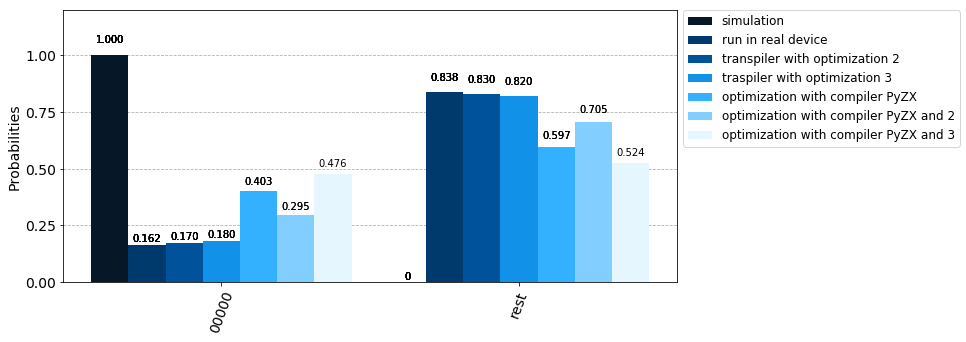

In [28]:
leg = ['simulation', 'run in real device', 'transpiler with optimization 2', 'traspiler with optimization 3', 'optimization with compiler PyZX', 'optimization with compiler PyZX and 2', 'optimization with compiler PyZX and 3']
# ['#061727', '#012749', '#003a6d', '#00539a', '#0072c3','#1192e8','#33b1ff','#82cfff','#bae6ff', '#e5f6ff'] 
colors = ['#061727', '#003a6d', '#00539a', '#1192e8','#33b1ff','#82cfff','#e5f6ff']
plot_histogram([counts_sim, counts_dev,counts_opt2,counts_opt3,counts_pyzx,counts_pyzx_2,counts_pyzx_3], number_to_keep = 1, color=colors, legend = leg, figsize=(11, 5))

### Ignis

In [32]:
# Generate the calibration circuits
qr_ignis = QuantumRegister(5)
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1,2,3,4], qr=qr_ignis, circlabel='mcal')

In [29]:
id_ignis='5e232a907f92b80019e83bc4'
job_ignis = backend.retrieve_job(id_ignis)
cal_results= job_ignis.result()



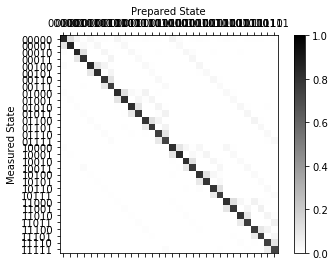

In [33]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
# Plot the calibration matrix
meas_fitter.plot_calibration()

In [53]:
# What is the measurement fidelity?
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

Average Measurement Fidelity: 0.795624


In [34]:
# Get the filter object
meas_filter = meas_fitter.filter

In [35]:
job_pyzx_3 = backend.retrieve_job(id_pyzx_3)
result_pyzx_3= job_pyzx_3.result()

In [36]:
mitigated_results_py3 = meas_filter.apply(result_pyzx_3)
mitigated_counts_py3 = mitigated_results_py3.get_counts(0)

In [37]:
print(mitigated_counts_py3)

{'01101': 1.9025926667470827e-13, '00010': 231.42320558949913, '10110': 4.109007052796251e-12, '11101': 3.7355020335652633e-13, '10101': 4.127682353902151e-13, '11100': 7.1944631784177926e-12, '11010': 10.26373952357675, '00110': 10.496659988495209, '00100': 22.39818144617853, '11110': 6.602006891480092e-12, '11000': 6.027141230280036, '01010': 31.45169408193904, '01100': 3.8999590198554595, '01110': 1.379207151589422e-11, '10100': 0.9860952727654981, '01111': 9.08176935347435e-13, '10010': 72.53372987491537, '01000': 29.877042019718104, '10000': 63.0523429553835, '00000': 541.5902089976015, '11111': 2.8337000714667715e-13}


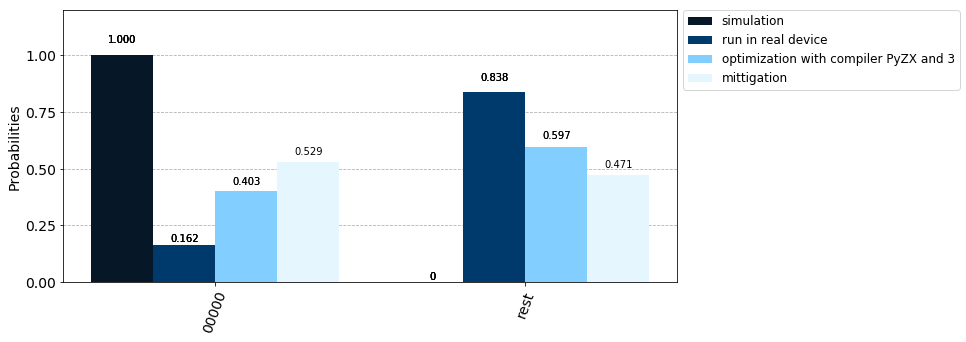

In [38]:
leg = ['simulation', 'run in real device', 'optimization with compiler PyZX and 3', 'mittigation']
colors = ['#061727', '#003a6d', '#82cfff','#e5f6ff']
plot_histogram([counts_sim, counts_dev,counts_pyzx, mitigated_counts_py3], number_to_keep = 1, color=colors, legend = leg, figsize=(11, 5))

### Find just the ones where the target qubit holds |0>

In [40]:
counts_sim_0 = sum_right(0, counts_sim)
print(counts_sim_0)

{'good': 1024, 'bad': 0}


In [41]:
counts_dev_0 = sum_right(0, counts_dev)
print(counts_dev_0)

{'good': 539, 'bad': 485}


In [42]:
counts_opt2_0 = sum_right(0, counts_opt2)
print(counts_opt2_0)

{'good': 505, 'bad': 519}


In [43]:
counts_opt3_0 = sum_right(0, counts_opt3)
print(counts_opt3_0)

{'good': 446, 'bad': 578}


In [44]:
counts_pyzx_0 = sum_right(0, counts_pyzx)
print(counts_pyzx_0)

{'good': 376, 'bad': 648}


In [45]:
counts_pyzx2_0 = sum_right(0, counts_pyzx_2)
print(counts_pyzx2_0)

{'good': 456, 'bad': 568}


In [46]:
counts_pyzx3_0 = sum_right(0, counts_pyzx_3)
print(counts_pyzx3_0)

{'good': 662, 'bad': 362}


In [47]:
mitigated_counts_0= sum_right(0, mitigated_counts_py3)
print(mitigated_counts_0)

{'good': 667.8309709417908, 'bad': 356.1690290584512}


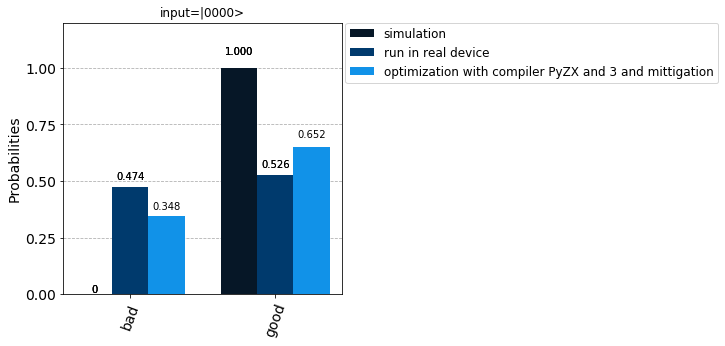

In [85]:
leg = ['simulation', 'run in real device', 'optimization with compiler PyZX and 3 and mittigation']
colors = ['#061727', '#003a6d', '#1192e8']
plot_histogram([counts_sim_0, counts_dev_0, mitigated_counts_0], title='input=|0000>', color=colors, legend = leg, figsize=(5, 5))

<p style='text-align: right;'> [back to top](#index) </p>

<a id = 'oin'></a>

## Tests with different inputs

To obtain a faithful experience, tests with different inputs are essential.

When the controls are |101> the target should change (the initial target value is |1>)

In [53]:
qc_init_1011 = QuantumCircuit(qr,cr)

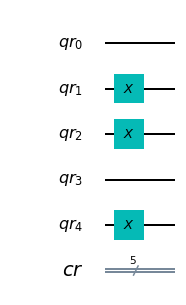

In [54]:
qc_init_1011.x(qr[2])
qc_init_1011.x(qr[4])
qc_init_1011.x(qr[1])


qc_init_1011.draw(output='mpl')

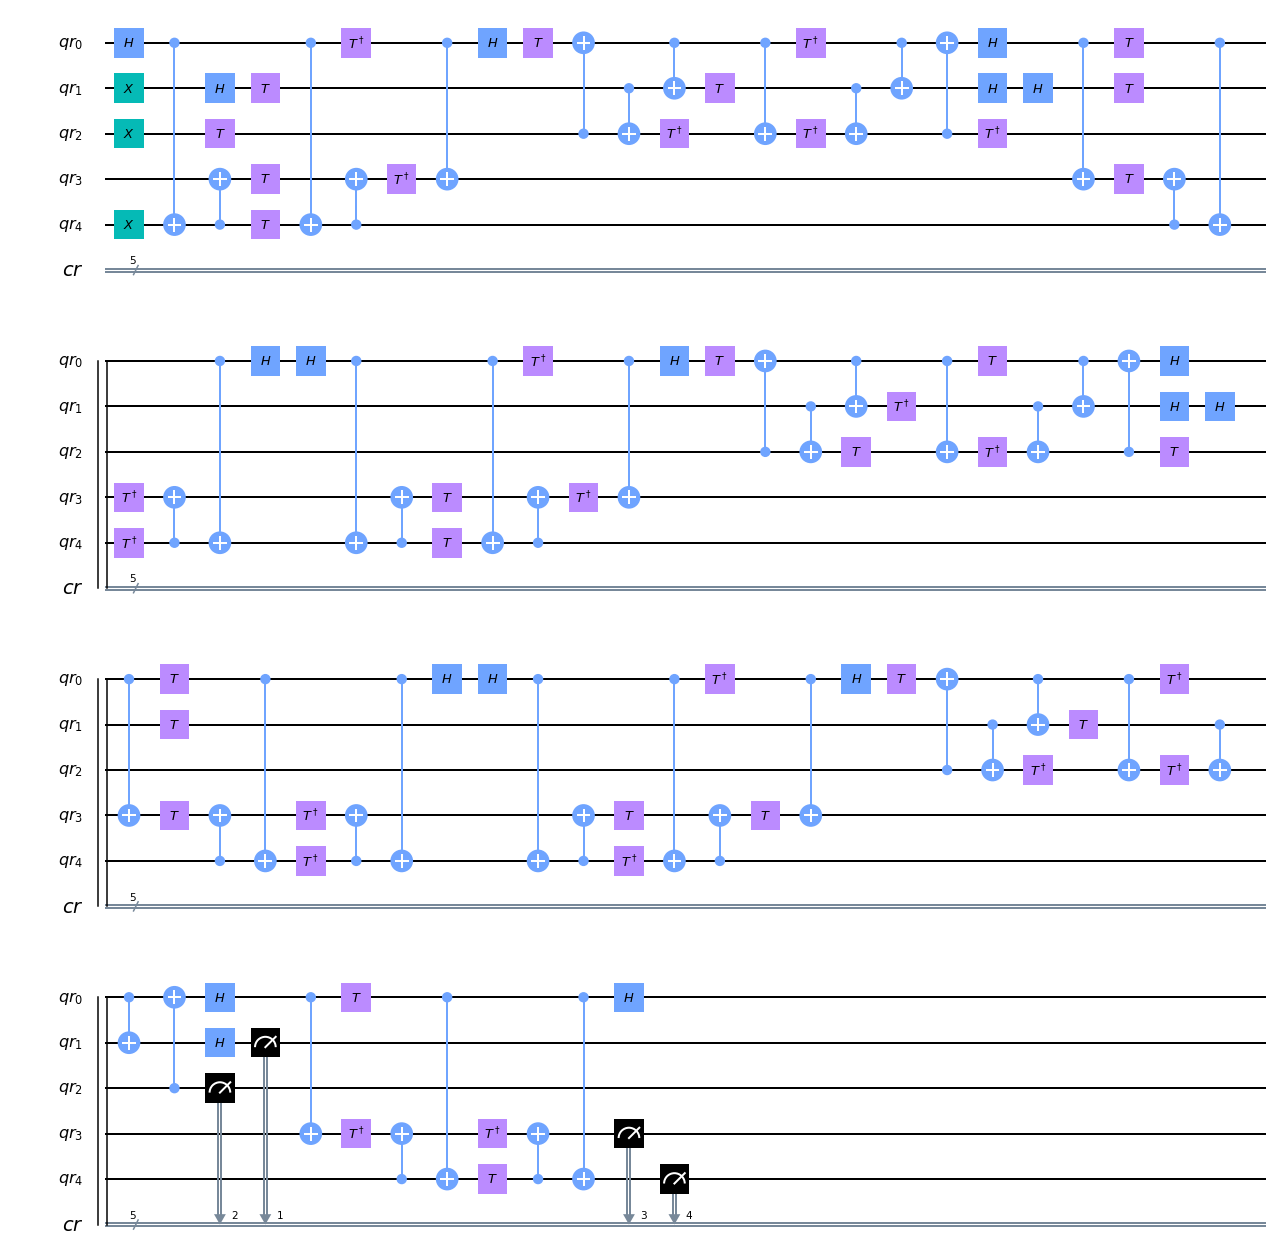

In [55]:
qc_1011 = qc_init_1011 + qc_m

qc_1011.draw(output='mpl')

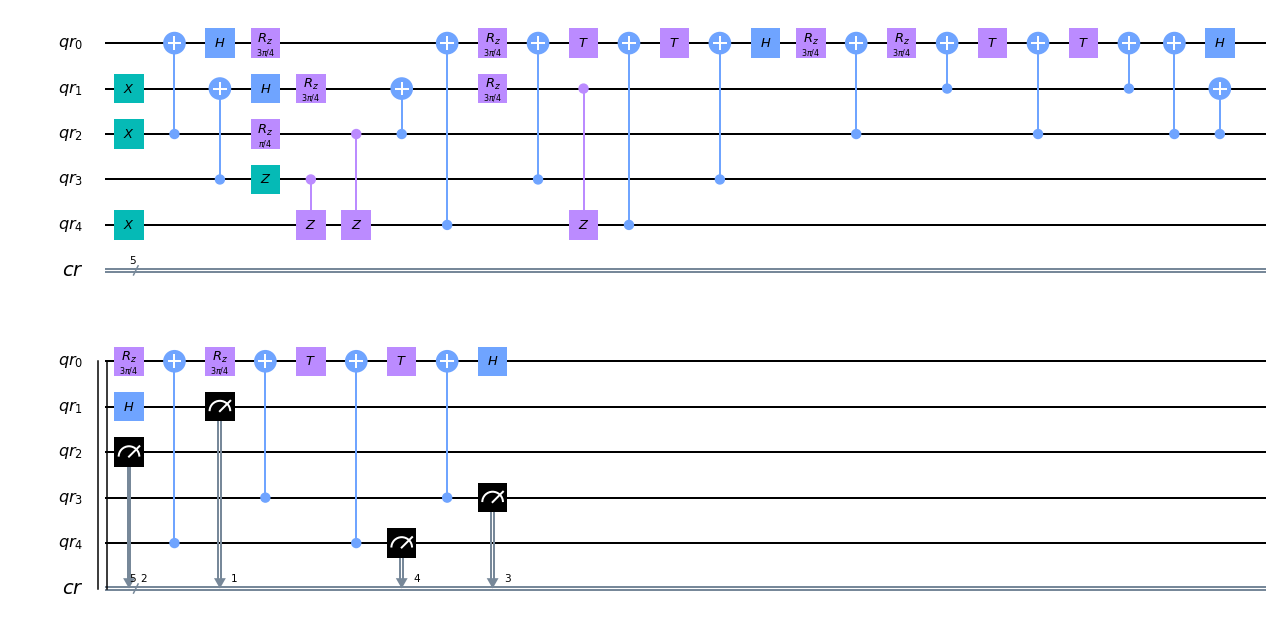

In [63]:
qc_1011_pyzx = qc_init_1011 + qc_pyzx

qc_1011_pyzx.draw(output='mpl')

In [64]:
id_temp, counts_sim_1011 = running_circuit(qc_1011, backend_sim)
print(counts_sim_1011)

{'10100': 1024}


In [65]:
id_temp, counts_sim_1011_p = running_circuit(qc_1011_pyzx, backend_sim)
print(counts_sim_1011_p)

{'10100': 1024}


In [66]:
id_run_1011='5e233fec02ea9e0018dfcd77'
job = backend.retrieve_job(id_run_1011)
result_run_1011= job.result()
counts_dev_1011= result_run_1011.get_counts()

print(counts_dev_1011)

{'01110': 46, '10010': 66, '10000': 89, '00000': 121, '11110': 51, '01000': 63, '01100': 48, '11010': 33, '11000': 53, '00100': 86, '00010': 79, '10100': 59, '11100': 44, '00110': 73, '01010': 57, '10110': 56}


In [67]:
id_pyzx_1011='5e23417c15a69a001850e83d'
job = backend.retrieve_job(id_pyzx_1011)
result_pyzx_1011= job.result()
counts_pyzx_1011= result_pyzx_1011.get_counts()

print(counts_pyzx_1011)

{'01110': 31, '10010': 55, '10000': 89, '00000': 31, '11110': 60, '01000': 9, '01100': 13, '11010': 18, '11000': 20, '00100': 93, '00010': 23, '10100': 337, '11100': 41, '00110': 54, '01010': 13, '10110': 137}


In [138]:
qc_pyzx_o3_1011 = transpile(qc_1011_pyzx, backend=backend, optimization_level=3)

In [139]:
id_temp, counts_sim_1011_p3 = running_circuit(qc_pyzx_o3_1011, backend_sim)
print(counts_sim_1011_p3)

{'10100': 1024}


In [68]:
id_pyzx3_1011='5e234479c6f25700180ee6f4'
job = backend.retrieve_job(id_pyzx3_1011)
result_pyzx3_1011= job.result()
counts_pyzx3_1011= result_pyzx3_1011.get_counts()

print(counts_pyzx3_1011)

{'01110': 52, '10010': 88, '10000': 123, '00000': 91, '11110': 56, '01000': 42, '01100': 39, '11010': 84, '11000': 52, '00100': 55, '00010': 79, '10100': 60, '11100': 44, '00110': 46, '01010': 56, '10110': 57}


In [141]:
qc_pyzx_o2_1011 = transpile(qc_1011_pyzx, backend=backend, optimization_level=2)

In [142]:
id_temp, counts_sim_1011_p2 = running_circuit(qc_pyzx_o2_1011, backend_sim)
print(counts_sim_1011_p2)

{'10100': 1024}


In [69]:
id_pyzx2_1011='5e234738c2132900184c77fd'
job = backend.retrieve_job(id_pyzx2_1011)
result_pyzx2_1011= job.result()
counts_pyzx2_1011= result_pyzx2_1011.get_counts()

print(counts_pyzx2_1011)

{'01110': 22, '10010': 66, '10000': 73, '00000': 51, '11110': 28, '01000': 11, '01100': 19, '11010': 21, '11000': 21, '00100': 111, '00010': 40, '10100': 143, '11100': 28, '00110': 138, '01010': 20, '10110': 232}


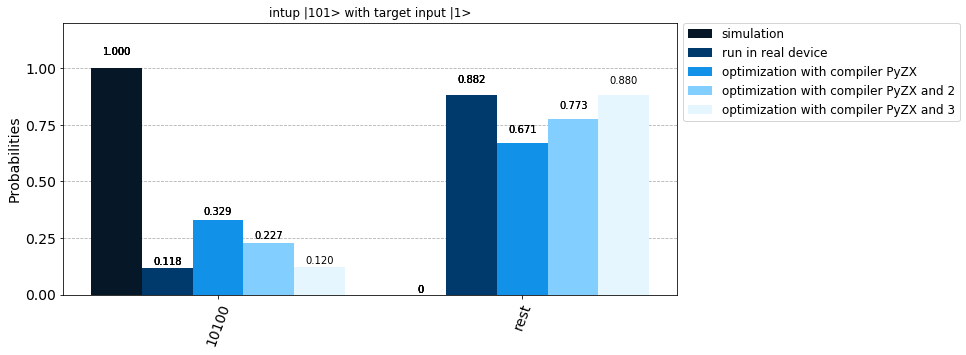

In [70]:
leg = ['simulation', 'run in real device','optimization with compiler PyZX','optimization with compiler PyZX and 2', 'optimization with compiler PyZX and 3']
colors = ['#061727', '#003a6d', '#1192e8','#82cfff','#e5f6ff']
plot_histogram([counts_sim_1011, counts_dev_1011, counts_pyzx_1011, counts_pyzx2_1011, counts_pyzx3_1011], target_string='10100', number_to_keep=1,color=colors, legend = leg, figsize=(11, 5), title='intup |101> with target input |1>')

In [145]:
job_pyzx_2_1011 = backend.retrieve_job(id_pyzx2_1011)
result_pyzx2_1011= job_pyzx_2_1011.result()

In [72]:
mitigated_results_py2_1011 = meas_filter.apply(result_pyzx2_1011)
mitigated_counts_py2_1011 = mitigated_results_py2_1011.get_counts(0)

In [73]:
print(mitigated_counts_py2_1011)

{'00010': 28.348896079648775, '10110': 278.46034881838597, '11100': 25.236287681747786, '11010': 16.398856577218712, '00110': 152.03936776335644, '00100': 108.01848479352613, '11110': 27.521920854591524, '11000': 15.003203857793961, '01010': 14.982431798926187, '01100': 12.329312835245497, '01110': 17.27124607417347, '10100': 155.49692467175146, '10010': 60.871105410866406, '01000': 3.6283887956429672, '10000': 71.01845109474996, '00000': 37.37477289246938}


In [162]:
job_pyzx_1011 = backend.retrieve_job(id_pyzx_1011)
result_pyzx_1011= job_pyzx_1011.result()

In [74]:
mitigated_results_py_1011 = meas_filter.apply(result_pyzx_1011)
mitigated_counts_py_1011 = mitigated_results_py_1011.get_counts(0)

In [75]:
print(mitigated_counts_py_1011)

{'00010': 14.136299968825842, '10110': 156.76357040605757, '11100': 38.14535228132481, '11010': 10.70725016548844, '00110': 52.18851265331513, '00100': 81.50175904997565, '11110': 70.24992913629833, '11000': 12.385737366418335, '01010': 6.149067042338287, '01100': 3.8711620529374478, '01110': 29.21428388433393, '10100': 399.0275760047927, '01001': 2.2206062443564626e-13, '10010': 52.510893369859424, '01000': 2.2685604331294105, '10000': 80.8863180976907, '00000': 13.993728087350373}


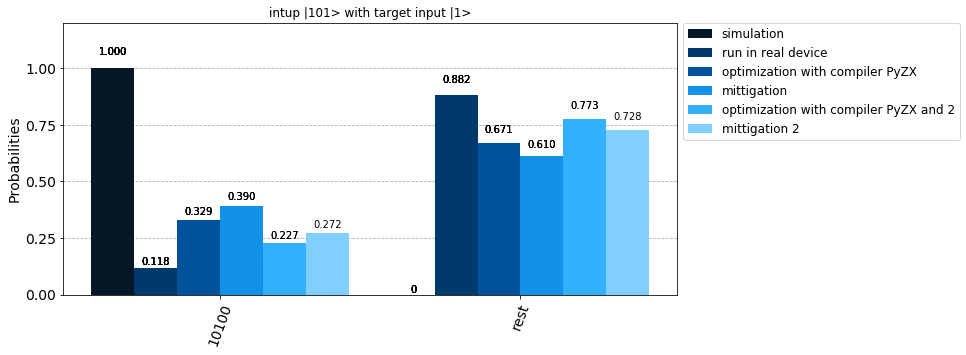

In [76]:
leg = ['simulation', 'run in real device','optimization with compiler PyZX', 'mittigation', 'optimization with compiler PyZX and 2', 'mittigation 2']
colors = ['#061727', '#003a6d', '#00539a', '#1192e8','#33b1ff','#82cfff']
plot_histogram([counts_sim_1011, counts_dev_1011, counts_pyzx_1011,mitigated_counts_py_1011, counts_pyzx2_1011,mitigated_counts_py2_1011 ], target_string='10100', number_to_keep = 1, color=colors, legend = leg, figsize=(11, 5), title='intup |101> with target input |1>')

In [77]:
counts_sim_2 = sum_right(0, counts_sim_1011)
print(counts_sim_2)

{'good': 1024, 'bad': 0}


In [78]:
counts_dev_2 = sum_right(0, counts_dev_1011)
print(counts_dev_2)

{'good': 563, 'bad': 461}


In [79]:
counts_pyzx_2 = sum_right(0, counts_pyzx_1011)
print(counts_pyzx_2)

{'good': 633, 'bad': 391}


In [80]:
counts_pyzx2_2 = sum_right(0, counts_pyzx2_1011)
print(counts_pyzx2_2)

{'good': 457, 'bad': 567}


In [81]:
counts_pyzx3_2 = sum_right(0, counts_pyzx3_1011)
print(counts_pyzx3_2)

{'good': 506, 'bad': 518}


In [82]:
mitigated_counts_2= sum_right(0, mitigated_counts_py_1011)
print(mitigated_counts_2)

{'good': 632.0801933736197, 'bad': 391.91980662651696}


In [83]:
mitigated_counts_2_2= sum_right(0, mitigated_counts_py2_1011)
print(mitigated_counts_2_2)

{'good': 428.10582662292717, 'bad': 595.8941733771676}


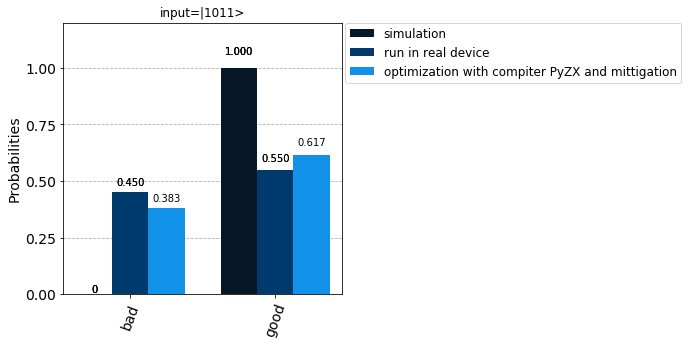

In [92]:
leg = ['simulation', 'run in real device', 'optimization with compiter PyZX and mittigation']
colors = ['#061727', '#003a6d', '#1192e8']
plot_histogram([counts_sim_2, counts_dev_2,  mitigated_counts_2], title='input=|1011>', color=colors, legend = leg, figsize=(5, 5))

#### other important simulations 

In [17]:
qubit_controls = 3
qubit_target = 1

total_qubits = 3+1

number_inputs = 2**total_qubits

data = np.arange(number_inputs)
data_input=[]

for i in data:
    data_input.append(bin(i)[2:].zfill(total_qubits))

print(data_input)

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


In [40]:
for i in data_input:
    print('init circuit: ', i[::-1])
    count=0
    qcircuit = QuantumCircuit(qr,cr)
    for y in i:
        if y == '1':
            qcircuit.x(qr[count+1])
        count = count+1
    qcircuit = qcircuit + qc_m
    id_temp, counts_temp = running_circuit(qcircuit, backend_sim)
    print('output:       ', list(counts_temp.keys())[0][:-1])

init circuit:  0000
output:        0000
init circuit:  1000
output:        1001
init circuit:  0100
output:        0100
init circuit:  1100
output:        1100
init circuit:  0010
output:        0010
init circuit:  1010
output:        1011
init circuit:  0110
output:        0111
init circuit:  1110
output:        1110
init circuit:  0001
output:        0001
init circuit:  1001
output:        1000
init circuit:  0101
output:        0101
init circuit:  1101
output:        1101
init circuit:  0011
output:        0011
init circuit:  1011
output:        1010
init circuit:  0111
output:        0110
init circuit:  1111
output:        1111


In [43]:
for i in data_input:
    print('init circuit: ', i[::-1])
    count=0
    qcircuit = QuantumCircuit(qr,cr)
    for y in i:
        if y == '1':
            qcircuit.x(qr[count+1])
        count = count+1
    qcircuit = qcircuit + qc_pyzx
    id_temp, counts_temp = running_circuit(qcircuit, backend_sim)
    print('output:       ', list(counts_temp.keys())[0][:-1])

init circuit:  0000
output:        0000
init circuit:  1000
output:        1001
init circuit:  0100
output:        0100
init circuit:  1100
output:        1100
init circuit:  0010
output:        0010
init circuit:  1010
output:        1011
init circuit:  0110
output:        0111
init circuit:  1110
output:        1110
init circuit:  0001
output:        0001
init circuit:  1001
output:        1000
init circuit:  0101
output:        0101
init circuit:  1101
output:        1101
init circuit:  0011
output:        0011
init circuit:  1011
output:        1010
init circuit:  0111
output:        0110
init circuit:  1111
output:        1111


<p style='text-align: right;'> [back to top](#index) </p>